In [1]:
import numpy as np
import re
import requests
from bs4  import BeautifulSoup as soup
from tqdm import tqdm
import networkx as nx
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from pychord import Chord, ChordProgression
import itertools
import pickle
import os
import glob
%matplotlib inline

In [7]:
import json

In [2]:
def adj_cluster(G):
    pass

In [3]:
# ramones = sorted(glob.glob('./ramones_555/*.edgelist'))
# beatles = sorted(glob.glob('./the_beatles_1916/*.edgelist'))
ramones = sorted(glob.glob('./Country/*.edgelist'))
beatles = sorted(glob.glob('./Electronic/*.edgelist'))

In [4]:
def print_info(G, average_clustering=False):
    print(nx.info(G))
    print('Is directed graph:',nx.is_directed(G))
    try:
        print("average clustering:",nx.average_clustering(G))
    except:
        print("calculate average clustering unsuccessful, this graph is not connected")
    try:
        print('path lengtn:',nx.average_shortest_path_length(G))
    except:
        print("calculate path length unsuccessful, this graph is not connected")
def apl_clust(G):
    return (nx.average_clustering(G),nx.average_shortest_path_length(G))

In [53]:
r_data = []
for i in tqdm(ramones):
    G = nx.read_edgelist(i,comments='/')
    r_data.append(apl_clust(G))

100%|██████████| 41/41 [00:00<00:00, 59.96it/s]


In [54]:
# 'number_of_edges','number_of_nodes','number_of_selfloops'

In [55]:
b_data = []
for i in tqdm(beatles):
    G = nx.read_edgelist(i,comments='/')
    b_data.append(apl_clust(G))

100%|██████████| 39/39 [00:01<00:00, 27.67it/s]


In [56]:
xr,yr = [],[]
[(xr.append(xi),yr.append(yi)) for xi,yi in r_data]
xb,yb = [],[]
[(xb.append(xi),yb.append(yi)) for xi,yi in b_data]
0

0

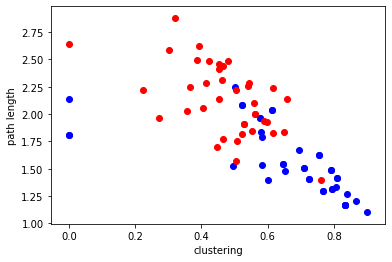

In [59]:
plt.xlabel('clustering')
plt.ylabel('path length')

plt.scatter(xr,yr,c='blue')
plt.scatter(xb,yb,c='red')

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score
X = r_data+b_data
# 1 ramones, 0 beatles
y = [1 for i in range(len(r_data))]+[0 for i in range(len(b_data))]
clf = svm.SVC()
clf.fit(X, y)
y_pred = clf.predict(X)
accuracy_score(y, y_pred)

In [73]:
from sklearn import svm
from sklearn.metrics import accuracy_score

In [72]:
X = r_data+b_data
# 1 ramones, 0 beatles
y = [1 for i in range(len(r_data))]+[0 for i in range(len(b_data))]

In [74]:
clf = svm.SVC()
clf.fit(X, y)

/Users/xieewenz/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [76]:
y_pred = clf.predict(X)

In [77]:
accuracy_score(y, y_pred)

0.8

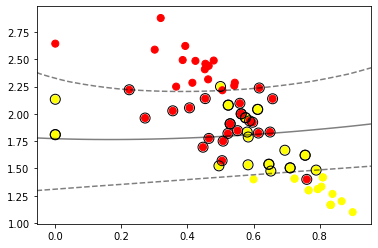

In [82]:
model = clf
ax = plt.gca()
plt.scatter(xr+xb, yr+yb, c=y, s=50, cmap='autumn')
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

9

In [5]:
class SongChords:
    def __init__(self, c, G):
        self.c = c
        self.G = G
    def get(self):
        return (self.c, self.G)
S = pickle.load(open('Country/010.pickle','rb'))

In [8]:
d = {
    'edges':[[1,2],[3,4],[4,1]],
    'features':{
        '1':'2',
        '2':'3',
        '3':'2',
        '4':'1'}
}
json.dumps(d)

'{"edges": [[1, 2], [3, 4], [4, 1]], "features": {"1": "2", "2": "3", "3": "2", "4": "1"}}'

In [64]:
jl = glob.glob('/Users/xieewenz/python/graph2vec/dataset/*.json')
for i in jl:
    d = json.load(open(i))
    edges = d['edges']
    ed = []
    for e in edges:
        n = [str(e[0]),str(e[1])]
        ed.append(n)
    d['edges'] = ed
    json.dump(d,open(i,'w'))

In [36]:
csvfile = open('allstuffs2.csv','w')

name = 'the_beatles_1916'
val = 0
pickles = glob.glob(f'./{name}-2d/*.pickle')
counter=0
for p in pickles:
    s = pickle.load(open(p,'rb'))
    t = ''
    for i in s.get()[0]:
        t+=i+' '
    csvfile.write(t+','+str(val)+'\n')
    if counter>=10: break

csvfile.close()

In [37]:
csvfile = open('allstuffs2.csv','a')

name = 'ramones_555'
val = 1
pickles = glob.glob(f'./{name}-2d/*.pickle')
counter = 0
for p in pickles:
    s = pickle.load(open(p,'rb'))
    t = ''
    for i in s.get()[0]:
        t+=i+' '
    csvfile.write(t+','+str(val)+'\n')    
    if counter>= 10: break

csvfile.close()

In [44]:
gg=nx.read_edgelist('/Users/xieewenz/Downloads/cs224w-master/data/song_chords/Rock/211.txt', comments='--')
gg

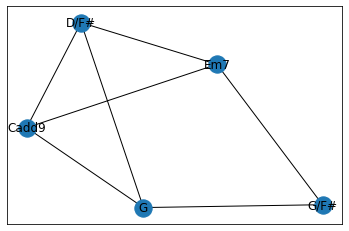

In [45]:
nx.draw_networkx(gg)

In [46]:
r = glob.glob('/Users/xieewenz/Downloads/cs224w-master/data/song_chords/Rock/*.txt')
p = glob.glob('/Users/xieewenz/Downloads/cs224w-master/data/song_chords/Pop/*.txt')



In [82]:
for i in r:
    
    
    with open(i) as f:
        l = f.readlines()
        l = [i[:-1] for i in l]
    l = l[2:]
    chords = []
    for chord in l:
        chords.append(chord.split('\t'))
    d = {}
    d['edges']=chords
    json.dump(d, open('/Users/xieewenz/Downloads/cs224w-master/data/song_chords/Rock1/'+i[-7:-4]+'.json','w'))

In [ ]:
for i in p:
    
    
    with open(i) as f:
        l = f.readlines()
        l = [i[:-1] for i in l]
    l = l[2:]
    chords = []
    for chord in l:
        chords.append(chord.split('\t'))
    d = {}
    d['edges']=chords
    json.dump(d, open('/Users/xieewenz/Downloads/cs224w-master/data/song_chords/Pop1/'+i[-7:-4]+'.json','w'))

In [84]:
import pandas as pd

In [137]:
path = 'rock4.csv'
df = pd.read_csv(path,encoding='ISO-8859-1')# 3rd party packages importing, encoding='ISO-8859-1')
df.head(5)


,type,x_0,x_1,x_2,x_3
0,1,-0.032970,0.018543,0.015211,0.048226
1,2,0.108486,-0.007542,-0.013002,-0.061200
2,3,0.005990,-0.048633,-0.033273,-0.103351
3,4,0.022332,-0.117932,0.070253,-0.085658
4,5,0.074927,0.007818,-0.030027,0.105973


In [138]:
a = df.drop('type', axis=1)
a = np.array(a)

In [139]:
path = 'pop4.csv'
df2 = pd.read_csv(path,encoding='ISO-8859-1')# 3rd party packages importing, encoding='ISO-8859-1')
df2.head(5)

,type,x_0,x_1,x_2,x_3
0,1,0.106390,0.094680,0.002282,-0.117972
1,2,-0.116400,-0.082458,-0.034743,-0.017415
2,3,-0.099736,-0.108122,-0.097002,0.118492
3,4,0.020029,0.080393,0.077830,0.029454
4,5,0.045818,-0.103154,0.088447,-0.008373


In [140]:
b = df2.drop('type', axis=1)
b = np.array(b)

In [141]:
len(a)

212

In [142]:
len(b)

97

In [195]:
# 1 for pop   2 for rock
y = [0 for i in range(97)]+[1 for i in range(212)]


In [196]:
# X = np.concatenate([a,b])


In [197]:
path = 'rockpop.csv'
df = pd.read_csv(path,encoding='ISO-8859-1')# 3rd party packages importing, encoding='ISO-8859-1')
df.head()
X = np.array(df.drop('type',axis=1))

In [200]:
from sklearn import svm
from sklearn.metrics import accuracy_score

clf = svm.SVC(kernel='linear')
clf.fit(X, y)
y_pred = clf.predict(X)
accuracy_score(y, y_pred)

0.686084142394822

In [201]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [135]:
from sklearn import svm
from sklearn.metrics import accuracy_score

clf = svm.SVC(kernel='rbf')
clf.fit(X, y)
y_pred = clf.predict(X)
accuracy_score(y, y_pred)

/Users/xieewenz/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.686084142394822

In [179]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
y_pred = clf.predict(X)
accuracy_score(y, y_pred)

1.0

In [180]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
from sklearn import tree

clf = tree.DecisionTreeClassifier()

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.4838709677419355

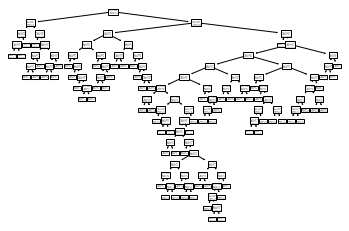